<a href="https://colab.research.google.com/github/SakshiPatial1234/Fake-News-Detection/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fake News Detection**

Naive Bayes

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [1]:
# ignoring warnings to remove clutter 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import json
import string
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

!pip install gensim
!pip install lightgbm

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  # stop words are, is, the etc. which are not needed for model
from nltk.stem.porter import PorterStemmer
from gensim.models import word2vec
from sklearn.manifold import TSNE

%matplotlib inline

from plotly import tools  # to install $ pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.tree import DecisionTreeClassifier 
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb # to install $ pip install lightgbm
from PIL import Image

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# only for google colab
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data.csv


In [4]:
from io import BytesIO
df = pd.read_csv('Data.csv')
print(df.shape)
df.head()

(3709, 32)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,content,spam_score_fector,category_factor,fake,click_bait_score,toxicity_factor,src_url_polarity,sentiment_score,stance
0,0,0,0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,88465,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print they pay back money plus interest the en...,0.993337,business,0,0.999951,0,1.0,0.1355,discuss
1,1,1,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,88465,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,why did attorney general loretta lynch plead t...,0.824470,business,0,0.997981,0,1.0,0.0000,discuss
2,2,2,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,88465,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,red state fox news sunday reported morning ant...,0.998415,business,0,0.001113,0,1.0,0.0000,discuss
3,3,3,3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,88465,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,email kayla mueller prisoner tortured isis cha...,0.982233,sport,0,0.001539,0,1.0,-0.2680,discuss
4,4,4,4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,88465,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,email healthcare reform to make america great ...,0.976653,business,0,0.998544,0,1.0,0.4670,unrelated


In [5]:
# Drop unwanted columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'ord_in_thread', 'replies_count', 'participants_count', 'country','likes', 'comments', 'site_url', 'language','content', 'ord_in_thread', 'uuid', 'crawled'], axis=1, inplace=True)

In [19]:
tc = df.corr()   
tc

,domain_rank,spam_score,shares,spam_score_fector,fake,click_bait_score,toxicity_factor,src_url_polarity,sentiment_score
domain_rank,1.000000,-0.064454,-0.020997,0.120741,-0.249628,0.028643,0.020848,0.014631,0.032460
spam_score,-0.064454,1.000000,0.006128,-0.103725,0.172558,0.029195,0.013025,-0.076754,0.049220
shares,-0.020997,0.006128,1.000000,0.005124,0.049648,-0.015414,-0.020004,-0.006060,0.052054
spam_score_fector,0.120741,-0.103725,0.005124,1.000000,-0.601603,-0.013450,0.035137,0.280719,-0.073461
fake,-0.249628,0.172558,0.049648,-0.601603,1.000000,-0.015002,-0.032278,-0.403428,0.087230
click_bait_score,0.028643,0.029195,-0.015414,-0.013450,-0.015002,1.000000,0.007328,0.013047,-0.013451
toxicity_factor,0.020848,0.013025,-0.020004,0.035137,-0.032278,0.007328,1.000000,0.027776,-0.010067
src_url_polarity,0.014631,-0.076754,-0.006060,0.280719,-0.403428,0.013047,0.027776,1.000000,-0.064444
sentiment_score,0.032460,0.049220,0.052054,-0.073461,0.087230,-0.013451,-0.010067,-0.064444,1.000000


In [21]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

In [22]:
from sklearn.metrics import  average_precision_score, precision_recall_curve


# Function to get Precision recall curve
def get_prec_recall (y_test,y_pred):
    average_precision = average_precision_score(y_test, y_pred)
    print('Average precision-recall score : {}'.format(average_precision))
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='cyan')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    return

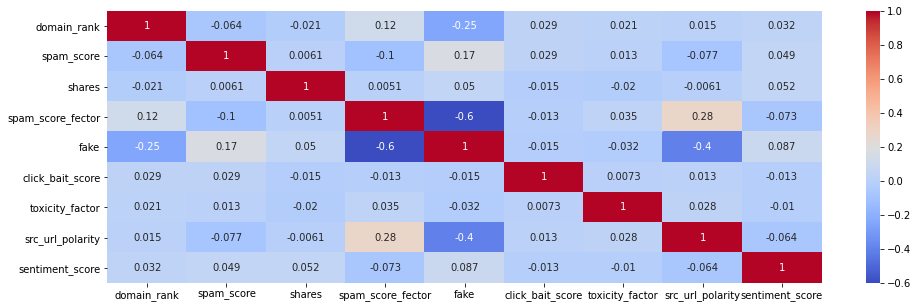

In [23]:
tc = df.corr()   #shows corelation in matrix form
plt.figure(figsize = (16,5))
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [24]:
X = df[[ 'spam_score_fector','click_bait_score','toxicity_factor','src_url_polarity','sentiment_score']]
y = df['fake']

In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 100)

In [26]:
Xr = df[[ 'domain_rank','shares']]
yr = df['fake']

In [27]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=.25, random_state = 100)

In [28]:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       506
           1       0.83      0.90      0.86       422

    accuracy                           0.87       928
   macro avg       0.87      0.87      0.87       928
weighted avg       0.87      0.87      0.87       928



In [31]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8691072948093138

Model Accuracy for Naive Bayes: 0.8706896551724138


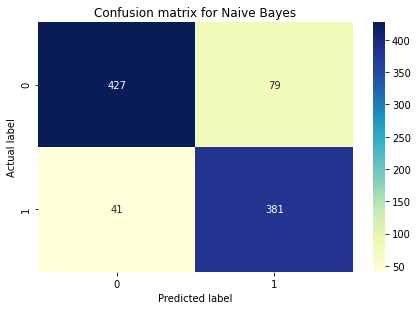

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_logreg = metrics.confusion_matrix(y_test, y_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

In [33]:
#from sklearn.metrics import accuracy_score 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  87.06896551724138


In [34]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,y_pred) #y_target, y_pred

0.12931034482758622

In [35]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,y_pred) #y_target, y_pred

0.12931034482758622

In [36]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

4.466289154726582

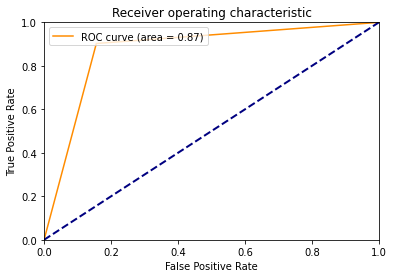

In [37]:
# Get ROC curve for Naive Bayes

get_roc(y_test,y_pred)

As the area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test.

Average precision-recall score : 0.7919710612703127


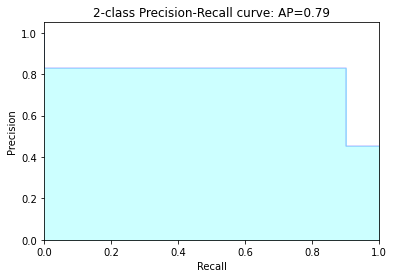

In [38]:
get_prec_recall(y_test,y_pred)

In [39]:
# Applying k-Fold Cross Validation for test set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logmodel, X = X_test, y = y_test, cv = 10)
accuracies.mean()

0.7876928471248246

In [40]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(classifier, X_train, y_train, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(classifier.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
GaussianNB average accuracy: 0.869 (+/-0.024)
GaussianNB average log_loss: 0.462 (+/-0.086)
GaussianNB average auc: 0.933 (+/-0.013)


The Naive Bayes classfier performs better than Logistic Regression with accuracy of 88%. The cross validation score also is better